In [1]:
import  matplotlib.pyplot as plt
import numpy as np

In [2]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [3]:
ans = step_function(np.array([1, 2, -2, 3]))
print(ans)

[1 1 0 1]


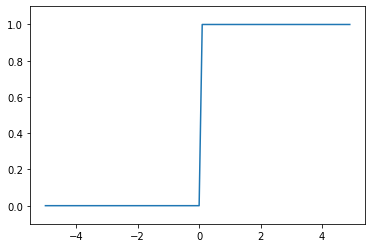

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

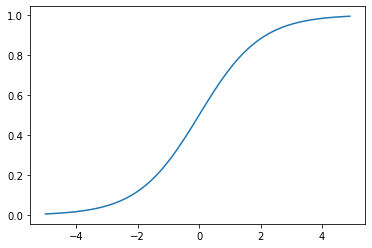

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # ブロードキャスト
y = sigmoid(x)
plt.plot(x, y)
plt.show()

In [6]:
x = np.array([-1.0, 1.0, 2.0])

In [7]:
y = sigmoid(x)
print(y)

[0.26894142 0.73105858 0.88079708]


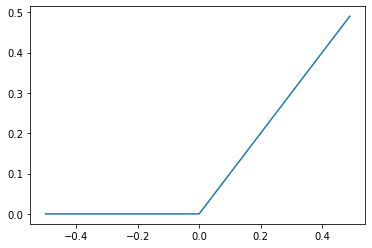

In [8]:
def ReLU(x):  # Rectified Liner Unit
    return np.maximum(0, x)
x = np.arange(-0.5, 0.5, 0.01)
y = ReLU(x)
plt.plot(x, y)
plt.show()

In [9]:
# 簡易なニューラルネットワークの実装
X = np.array([1, 2])
W = np.array([[1, 3, 5], [2, 4, 6]])
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


In [10]:
# 3層ニューラルネットワークのフォワード伝搬
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# 0-1層
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [11]:
# 3層ニューラルネットワークのフォワード伝搬
# 1-2層
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2)

[0.62624937 0.7710107 ]


In [12]:
# 3層ニューラルネットワークのフォワード伝搬
# 2-3層
def identity_function(x):
    return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


In [13]:
# 3層ニューラルネットワークのフォワード伝搬
# 関数で流れを統合
# ReLU版
import numpy as np

def ReLU(x):
    return np.maximum(0, x)

def identity_function(x):
    return x

def network_init():
    network = {}  # オブジェクト宣言
    network["W1"] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network["W2"] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network["W3"] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network["B1"] = np.array([0.1, 0.2, 0.3])
    network["B2"] = np.array([0.1, 0.2])
    network["B3"] = np.array([0.1, 0.2])
    return network

def forward(network, x):
    A1 = np.dot(x, network["W1"]) + network["B1"]
    Z1 = ReLU(A1)
    # Z1 = sigmoid(A1)
    A2 = np.dot(Z1, network["W2"]) + network["B2"]
    Z2 = ReLU(A2)
    # Z2 = sigmoid(A2)
    A3 = np.dot(Z2, network["W3"]) + network["B3"]
    Y = identity_function(A3)
    return Y

x = np.array([1.0, 0.5])
network = network_init()
y = forward(network, x)
print(y)
# ReLU -> 0

[0.426 0.912]


In [14]:
# softmax
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [15]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [16]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [17]:
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)  # cが引かれても全体としては数学的に結果は変わらない
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

In [18]:
a = np.array([1010, 1000, 990])
print(softmax(a))

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [19]:
# 手書き数字認識
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
# 学習データ呼び出し
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
# 形状出力
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [20]:
# 訓練画像の表示
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def showImg(img):
    pilImg = Image.fromarray(np.uint8(img))  # PIL用のフォーマットに変換
    pilImg.show()

(xTrain, tTrain), (xTest, tTest) = load_mnist(flatten=True, normalize=False)
img = xTrain[0]
label = tTrain[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

showImg(img)

5
(784,)
(28, 28)


In [21]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import pickle

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x)  # cが引かれても全体としては数学的に結果は変わらない
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

def getData():
    (xTrain, tTrain), (xTest, tTest) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return xTest, tTest

def initNetwork():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)  # 学習済みパラメータの読み込み
    return network

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

x, t = getData()
network = initNetwork()

accuracyCnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    # print(y)
    p = np.argmax(y)
    if p == t[i]:
        accuracyCnt += 1

print("Accuracy: " + str(float(accuracyCnt/len(x))))

Accuracy: 0.9352


In [22]:
x, _ = getData()

In [23]:
network = initNetwork()

In [24]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [25]:
x.shape

(10000, 784)

In [26]:
x[0].shape

(784,)

In [27]:
W1.shape

(784, 50)

In [28]:
W2.shape

(50, 100)

In [29]:
W3.shape

(100, 10)

In [6]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
import pickle

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x)  # cが引かれても全体としては数学的に結果は変わらない
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

def getData():
    (xTrain, tTrain), (xTest, tTest) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return xTest, tTest

def initNetwork():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)  # 学習済みパラメータの読み込み
    return network

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

x, t = getData()
network = initNetwork()

batch_size = 100
accuracyCnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    # print(y_batch)
    p = np.argmax(y_batch, axis=1)
    # print(p)
    # print(p == t[i:i+batch_size])
    # print(np.sum(p == t[i:i+batch_size]))
    accuracyCnt += np.sum(p == t[i:i+batch_size])

print("Accuracy: " + str(float(accuracyCnt/len(x))))

[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True]
96
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  Tr